In [15]:
# Install plotly for plotting.
!pip install plotly
# Import necessary libraries.
import pandas as pd
import plotly.express as px

# Load dataset only once
df = pd.read_csv('/content/imdb.csv')

In [16]:
df = pd.read_csv('/content/imdb.csv')

In [17]:
df.head()

,Rank,Movie_name,Year,Certificate,Runtime_in_min,Genre,Metascore,Gross_in_$_M,Rating_from_10
0,1,The Shawshank Redemption,1994,R,142,Drama,81.0,28.34,9.3
1,2,The Godfather,1972,R,175,"Crime, Drama",100.0,134.97,9.2
2,3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",84.0,534.86,9.0
3,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",94.0,377.85,9.0
4,5,Schindler's List,1993,R,195,"Biography, Drama, History",94.0,96.90,9.0


In [18]:
print(df.head())

  Rank                                     Movie_name  Year Certificate  \
0    1                       The Shawshank Redemption  1994           R   
1    2                                  The Godfather  1972           R   
2    3                                The Dark Knight  2008       PG-13   
3    4  The Lord of the Rings: The Return of the King  2003       PG-13   
4    5                               Schindler's List  1993           R   

   Runtime_in_min                      Genre  Metascore Gross_in_$_M  \
0             142                      Drama       81.0        28.34   
1             175               Crime, Drama      100.0       134.97   
2             152       Action, Crime, Drama       84.0       534.86   
3             201   Action, Adventure, Drama       94.0       377.85   
4             195  Biography, Drama, History       94.0        96.90   

   Rating_from_10  
0             9.3  
1             9.2  
2             9.0  
3             9.0  
4             9.

In [40]:
df['Year_clean'] = pd.to_numeric(df['Year'].str.extract('(\d{4})', expand=False))


In [38]:
# Split genres and explode into separate rows
df['Genres'] = df['Genre'].str.split(',')
genre_df = df.explode('Genres')

# Count occurrences and calculate average ratings
genre_popularity = genre_df['Genres'].value_counts()
genre_avg_ratings = genre_df.groupby('Genres')['Rating_from_10'].mean()

In [23]:
import plotly.express as px

# Combine genre statistics into a DataFrame
genre_stats = pd.DataFrame({
    'Genre': genre_popularity.index,
    'Movie_Count': genre_popularity.values,
    'Avg_Rating': genre_avg_ratings.round(2).values
})

# Sort the data by Movie_Count for better visualization
genre_stats = genre_stats.sort_values(by='Movie_Count', ascending=False).reset_index(drop=True)

# Create a bar chart
fig = px.bar(
    genre_stats,
    x='Genre',
    y='Movie_Count',
    color='Avg_Rating',  # Use Avg_Rating for color differentiation
    title='Movie Genres: Count and Average Rating',
    labels={
        'Genre': 'Genre',
        'Movie_Count': 'Number of Movies',
        'Avg_Rating': 'Average Rating'
    },
    color_continuous_scale='Viridis',  # Optional: change color scale
    width=900,
    height=500
)

# Display the bar chart
fig.show()


In [30]:
print("\nDataframe after genre split:")
print(df.head())

# plot the data
# Plot the data with color differentiation
fig1 = px.scatter(
    df,
    x='Year_clean',
    y='Rating_from_10',
    color='Rating_from_10',  # Map colors to the Rating_from_10 column
    color_continuous_scale='Viridis',  # You can change this to 'Plasma', 'Cividis', etc.
    title='Movie Ratings Trend Over Time',
    width=800,
    height=450,
    labels={'Year_clean': 'Year', 'Rating_from_10': 'Rating'}
)

fig1.show()


Dataframe after genre split:
  Rank                                     Movie_name  Year Certificate  \
0    1                       The Shawshank Redemption  1994           R   
1    2                                  The Godfather  1972           R   
2    3                                The Dark Knight  2008       PG-13   
3    4  The Lord of the Rings: The Return of the King  2003       PG-13   
4    5                               Schindler's List  1993           R   

   Runtime_in_min                      Genre  Metascore Gross_in_$_M  \
0             142                      Drama       81.0        28.34   
1             175               Crime, Drama      100.0       134.97   
2             152       Action, Crime, Drama       84.0       534.86   
3             201   Action, Adventure, Drama       94.0       377.85   
4             195  Biography, Drama, History       94.0        96.90   

   Rating_from_10  Year_clean                         Genres  
0             9.3      

In [31]:
import plotly.express as px

# Sample data (replace with your actual data)
years = [2000, 2001, 2002, 2003, 2004]
ratings = [7.5, 8.2, 6.9, 8.5, 7.8]
titles = ["Movie A", "Movie B", "Movie C", "Movie D", "Movie E"]

# Create the scatter plot
fig = px.scatter(
    x=years,  # X-axis: Year
    y=ratings,  # Y-axis: Ratings
    color=ratings,  # Differentiate points by color
    size=ratings,  # Differentiate points by size
    hover_name=titles,  # Add movie titles to hover info
    title='Movie Ratings Trend Over Time',
    labels={'x': 'Year', 'y': 'Rating (out of 10)'},
    width=800,
    height=450
)

# Show the plot
fig.show()


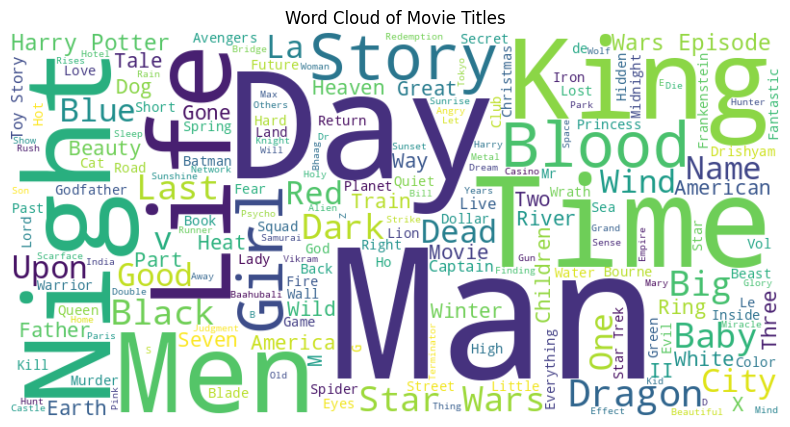

In [33]:
# Install the wordcloud library
!pip install wordcloud
# Import necessary libraries
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt # Import matplotlib to display the wordcloud
# Load dataset
df = pd.read_csv('/content/imdb.csv')
dataframe1 = pd.DataFrame(df['Movie_name'])
# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dataframe1['Movie_name']))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Word Cloud of Movie Titles')
plt.show()